In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from funcoes_aed import *

---
## __DataFrame das Vacinas__

### Vacina: Sarampo, rubéola e caxumba - Tríplice viral - __SCR__
## Ano: 2016, 2017 e 2018
### Região Norte

### __Descrição das Colunas__

| __Coluna__         | __Descrição__                                                                               |
|-------------------:|:------------------------------------------------------------------------------------------------|
|COD	             |                                                                                                 |
|CODMUN7	         |                                                                                                 |
|Estado	             | Uf                                                                                              |
|ano                 | Ano do programa de vacinação	                                                                   |
|Nome                | Nome do municipio                                                                               |
| CV_SCR1 (12 meses) | Primeira dose da Sarampo                                                                        |
| CV_SCR2 (15 meses) | Segunda dose da sarampo                                                                         |
| Poprural           | População rural                                                                                 |
| PopUrb             | População urbana                                                                                |
| RDPC               | Renda Domiciliar per capita                                                                     |
| PEA                | PEA - 10 anos ou mais                                                                           |
| IDHM               | IDHM                                                                                            |
| IDHM_E             | IDHM Educação                                                                                   |
| IDHM_L             | IDHM Longevidade                                                                                |
| IDHM_R             | IDHM Renda                                                                                      |
| T_ANALF18M         | Taxa de analfabetismo - 18 anos ou mais                                                         |
| T_MED18M           | % população com 18 anos ou mais com médio completo                                              |
| T_SUPER25M         | % população com 25 anos ou mais com superior completo                                           |
| T_AGUA             | % da população em domicílios com água encanada                                                  |
| T_BANAGUA          | % da população em domicílios com banheiro e água encanada                                       |
| T_DENS             | % da população em domicílios com com densidade > 2 pessoas/dormitório                           |
| T_LIXO             | % da população em domicílios com coleta de lixo                                                 |
| T_LUZ              | % da população em domicílios com energia elétrica                                               |
| AGUA_ESGOTO        | % de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados        |
| POPDOMCHEFMULHERES | % de população feminina de 10 anos ou mais de idade, responsáveis pelos domicílios particulares |
| DENSDEMOG2010      | Densidade demográfica (pessoas/área)                                                            |
| PERC_NV_7CPN       | % Nascidos Vivos de mães que realizaram 7 ou mais consultas em PN no ano de 2016                |
| CoberturaAB        | % Cobertura de Atenção Básica em Saúde                                                          |

---
# Cria o dataframe das vacinas, realizando algumas trativas básicas

In [2]:
df = cria_dataframe_vacinas()
df.head()

,COD,CODMUN7,UF,ANO,MUNICIPIO,SCR1,SCR2,POPRURAL,POPURB,RDPC,...,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,COBERTURA_AB,GP_SCR1,GP_SCR2
0,110001,1100015.0,Rondonia,2016,Alta Floresta D'Oeste,96.449997,92.080002,42.730000,57.270000,476.989990,...,22.58,94.050003,93.980003,9.31,26.920000,3.450000,67.180000,80.930000,Adequada,Baixa
1,110002,1100023.0,Rondonia,2016,Ariquemes,98.919998,89.519997,15.300000,84.699997,689.950012,...,27.15,96.720001,98.580002,11.40,32.630001,20.410000,72.620003,61.919998,Adequada,Baixa
2,110003,1100031.0,Rondonia,2016,Cabixi,109.639999,77.110001,57.340000,42.660000,457.170013,...,19.93,99.139999,96.360001,3.31,16.420000,4.800000,65.750000,100.000000,Adequada,Baixa
3,110004,1100049.0,Rondonia,2016,Cacoal,99.180000,82.320000,21.190001,78.809998,738.059998,...,20.50,98.169998,98.889999,1.85,31.730000,20.719999,74.589996,71.190002,Adequada,Baixa
4,110005,1100056.0,Rondonia,2016,Cerejeiras,99.279999,85.510002,15.330000,84.669998,577.179993,...,16.66,91.889999,98.849998,5.34,39.970001,6.120000,76.809998,95.910004,Adequada,Baixa


--- 

## Matriz de correlação

Inicialmente gerei a primeira matriz sem nenhum filtro.<br> Com os resultados desse primeiro plot, tracei algumas linhas para me ajudar a filtrar algumas colunas.

__Linha Vermelha__ : É a minha principal variavél, taxa de vacinados.
<br>__Linha Preta__ : São as colunas na horizontal com uma alta taxa.
<br> __Linha Amarela__ : São as colunas na vertical com uma alta taxa.

![alt text](./imagens/corr.png)

Text(0.5, 1.0, 'Gráfico de Correlação das Variavéis')

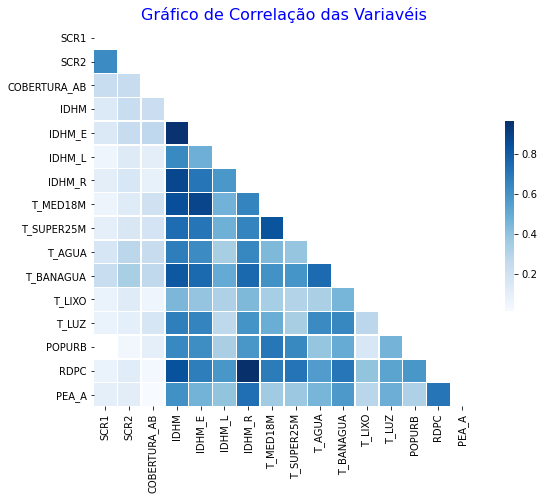

In [3]:
corr = df.loc[:,['SCR1', 'SCR2', 'COBERTURA_AB', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R', 'T_MED18M', 'T_SUPER25M', 'T_AGUA'
 , 'T_BANAGUA', 'T_LIXO', 'T_LUZ', 'POPURB', 'RDPC', 'PEA_A']].corr().round(4)
corr = corr[corr > 0]

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 7))

ax = sns.heatmap(corr, mask=mask, cmap='Blues',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title("Gráfico de Correlação das Variavéis", fontdict={'fontsize': 16, 'color': 'Blue'})

In [4]:
df_filtro = pd.DataFrame(df.loc[:,['UF', 'ANO', 'MUNICIPIO', 'SCR1', 'SCR2', 'COBERTURA_AB', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R', 'T_MED18M', 'T_SUPER25M', 'T_AGUA'
 , 'T_BANAGUA', 'T_LIXO', 'T_LUZ', 'POPURB', 'RDPC', 'PEA_A', 'GP_SCR1','GP_SCR2']])
df_filtro.dropna(inplace=True)

In [5]:
df_filtro['ANO'].unique()

array([2016, 2017, 2018])

In [6]:
df_filtro.T

,0,1,2,3,4,5,6,7,8,9,...,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349
UF,Rondonia,Rondonia,Rondonia,Rondonia,Rondonia,Rondonia,Rondonia,Rondonia,Rondonia,Rondonia,...,Tocantins,Tocantins,Tocantins,Tocantins,Tocantins,Tocantins,Tocantins,Tocantins,Tocantins,Tocantins
ANO,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
MUNICIPIO,Alta Floresta D'Oeste,Ariquemes,Cabixi,Cacoal,Cerejeiras,Colorado do Oeste,Corumbiara,Costa Marques,Espigão D'Oeste,Guajará-Mirim,...,Taguatinga,Taipas do Tocantins,Talismã,Palmas,Tocantínia,Tocantinópolis,Tupirama,Tupiratins,Wanderlândia,Xambioá
SCR1,96.45,98.92,109.64,99.18,99.28,134.94,119.82,122.69,89.07,119.02,...,78.71,150,104.76,145.42,111.64,98.57,191.67,80.95,91.47,73.33
SCR2,92.08,89.52,77.11,82.32,85.51,100.8,110.81,113.03,92.59,70.31,...,65.35,37.5,114.29,66.67,101.59,87.7,104.17,57.14,59.69,64.44
COBERTURA_AB,80.93,61.92,100,71.19,95.91,91.67,100,65.4,74.57,81.38,...,83.48,100,100,100,46.25,100,100,100,100,100
IDHM,0.641,0.702,0.65,0.718,0.692,0.685,0.613,0.611,0.672,0.657,...,0.634,0.601,0.654,0.788,0.589,0.681,0.67,0.587,0.638,0.671
IDHM_E,0.526,0.6,0.559,0.62,0.602,0.584,0.473,0.493,0.536,0.519,...,0.497,0.47,0.535,0.749,0.459,0.623,0.593,0.425,0.561,0.57
IDHM_L,0.763,0.806,0.757,0.821,0.799,0.814,0.774,0.751,0.819,0.823,...,0.818,0.798,0.801,0.827,0.782,0.801,0.808,0.791,0.748,0.818
IDHM_R,0.657,0.716,0.65,0.727,0.688,0.676,0.63,0.616,0.691,0.663,...,0.628,0.578,0.654,0.789,0.57,0.634,0.629,0.601,0.619,0.648


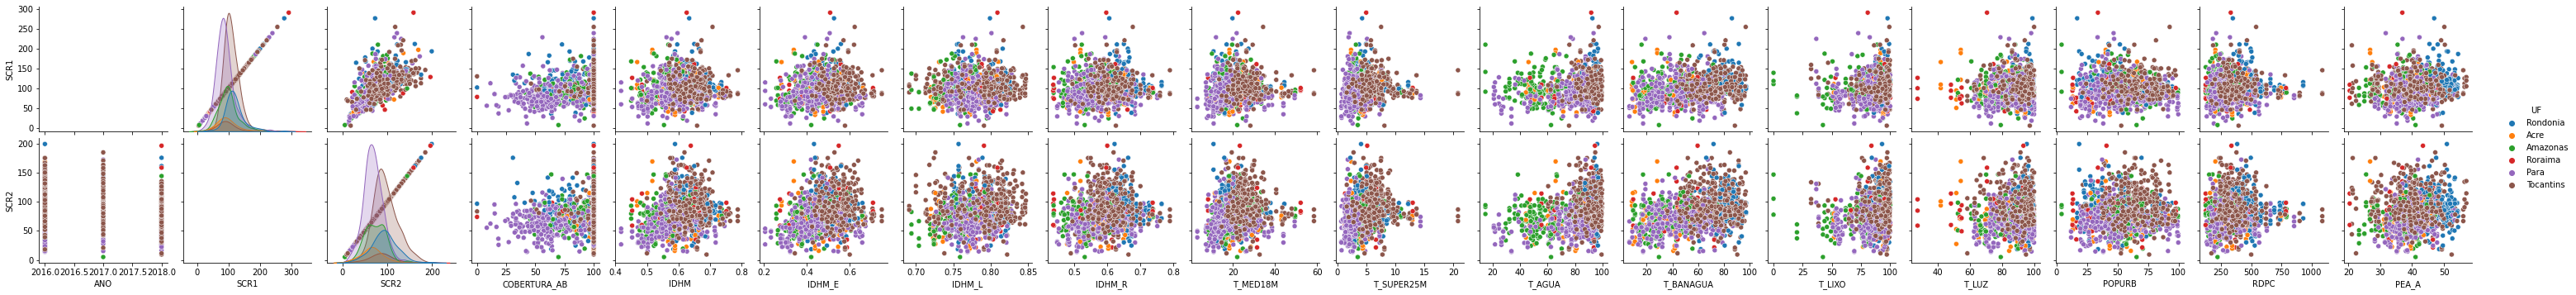

In [7]:
sns.pairplot(df_filtro, y_vars=['SCR1', 'SCR2'] ,hue="UF")

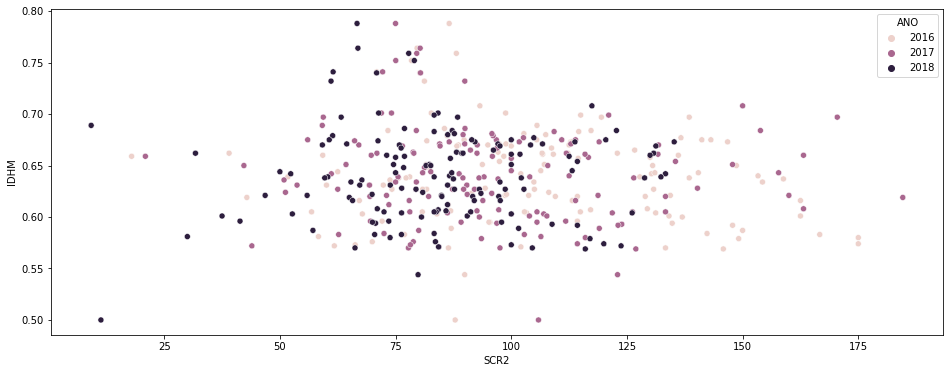

In [8]:
ax = sns.scatterplot(
    x="SCR2"
    , y="IDHM"
    , hue='ANO'
    ,data=df_filtro[df_filtro['UF'] == 'Tocantins']
)

ax.figure.set_size_inches(16,6)

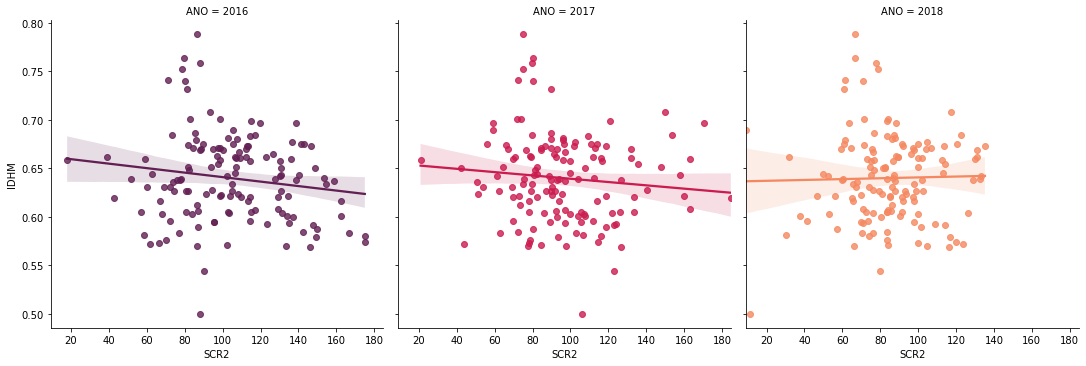

In [9]:
ax = sns.lmplot(
    data=df_filtro[df_filtro['UF'] == 'Tocantins']       
    , x="SCR2"
    , y="IDHM"
    , col='ANO'
    , hue='ANO'
    , palette='rocket'
)

---

<AxesSubplot:>

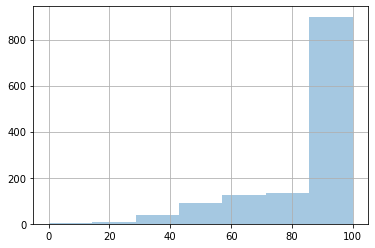

In [10]:
df_filtro['COBERTURA_AB'].hist(bins=7, alpha=0.4)

In [11]:
df_filtro['GP_COBERTURA'] = np.where(df_filtro['COBERTURA_AB'] <= 25, 25
         , np.where(df_filtro['COBERTURA_AB'] <= 50, 50
                    , np.where(df_filtro['COBERTURA_AB'] <= 75, 75
                               , np.where(df_filtro['COBERTURA_AB'] < 99, 98, 100
                                         )
                              )
                   )
        )

--- 
### Quais são as caracteristicas minimas de quem está nos grupos de cobertura

In [12]:
df_filtro.groupby(['GP_COBERTURA']).agg({
    'IDHM': np.min
    , 'IDHM_E': np.median
    , 'IDHM_L': np.median
    , 'IDHM_R': np.median
    , 'T_MED18M': np.median
    , 'T_SUPER25M': np.median
    , 'T_AGUA': np.median
    , 'T_BANAGUA': np.median
    , 'T_LIXO': np.median
    , 'T_LUZ': np.median
    , 'POPURB': np.median
    , 'RDPC': np.median
    , 'PEA_A': np.median
})

,IDHM,IDHM_E,IDHM_L,IDHM_R,T_MED18M,T_SUPER25M,T_AGUA,T_BANAGUA,T_LIXO,T_LUZ,POPURB,RDPC,PEA_A
GP_COBERTURA,,,,,,,,,,,,,
25,0.489,0.398,0.7780,0.541,12.170000,1.76,76.330002,31.570000,81.910004,72.760002,34.959999,231.940002,35.700001
50,0.453,0.425,0.7740,0.556,16.799999,2.60,81.040001,42.720001,89.430000,85.669998,45.119999,255.029999,39.419998
75,0.418,0.451,0.7730,0.583,17.559999,3.49,79.889999,43.450001,88.900002,88.889999,52.160000,300.589996,40.310001
98,0.418,0.488,0.7790,0.602,21.530001,4.31,88.360001,59.740002,90.940002,92.209999,60.980000,338.440002,40.485001
100,0.418,0.511,0.7875,0.594,22.350000,4.63,89.559998,61.250000,92.755005,93.029999,56.320000,321.940002,40.285000


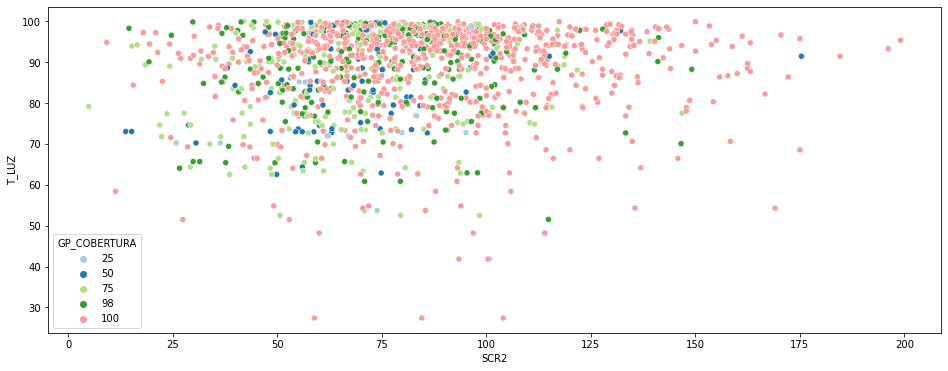

In [13]:
ax = sns.scatterplot(
    data = df_filtro
    , x = 'SCR2'
    , y = 'T_LUZ'
    , hue = 'GP_COBERTURA'
    , palette = 'Paired'
)
ax.figure.set_size_inches(16,6)

---
## Educação

"T_MED18M","T_SUPER25M"

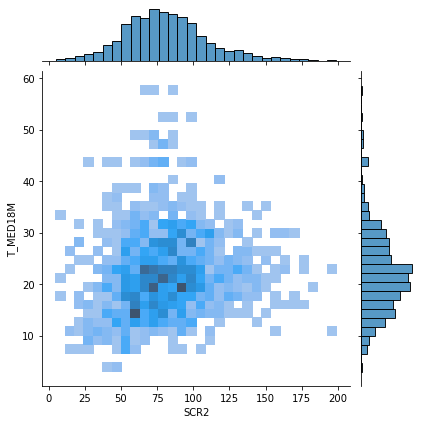

In [22]:
# % população com 18 anos ou mais com médio completo
ax2 = sns.jointplot(data=df_filtro, x='SCR2', y="T_MED18M", kind="hist")

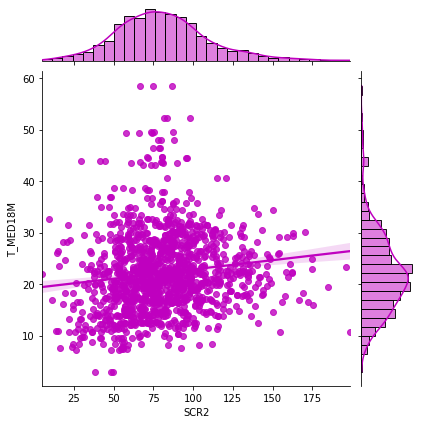

In [18]:
ax1 = sns.jointplot(data=df_filtro, x='SCR2', y="T_MED18M", kind="reg", color='m')

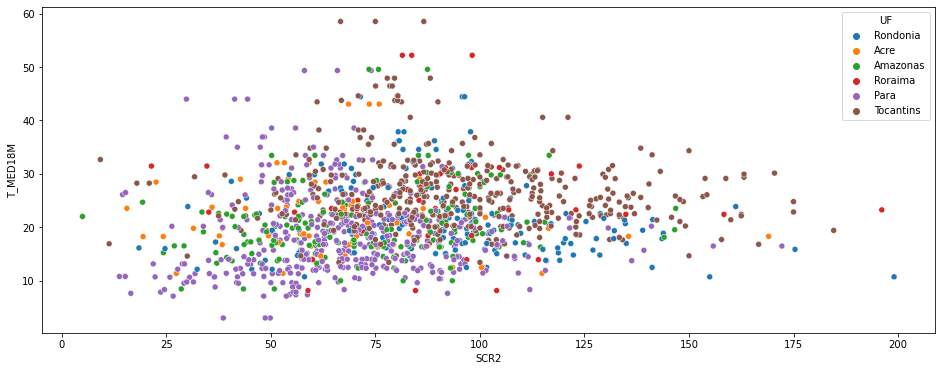

In [20]:
ax = sns.scatterplot(
    data = df_filtro
    , x = 'SCR2'
    , y = 'T_MED18M'
    , hue = 'UF'
)
ax.figure.set_size_inches(16,6)

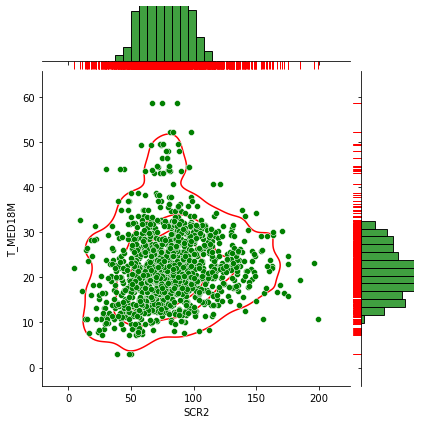

In [23]:
    ax3 = sns.jointplot(x='SCR2', y="T_MED18M", data=df_filtro, color='g') 
    ax3.plot_joint(sns.kdeplot, color="r", zorder=0, levels=5)
    ax3.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

---
## LONGEVIDADE

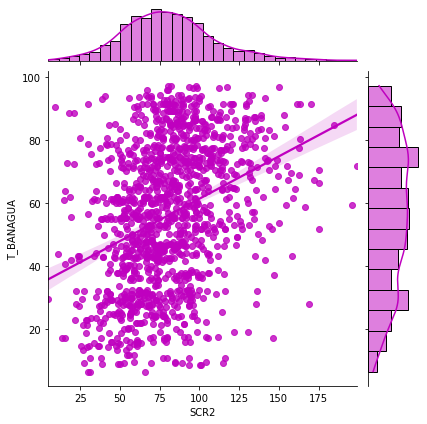

In [33]:
ax1 = sns.jointplot(data=df_filtro, x='SCR2', y="T_BANAGUA", kind="reg", color='m')

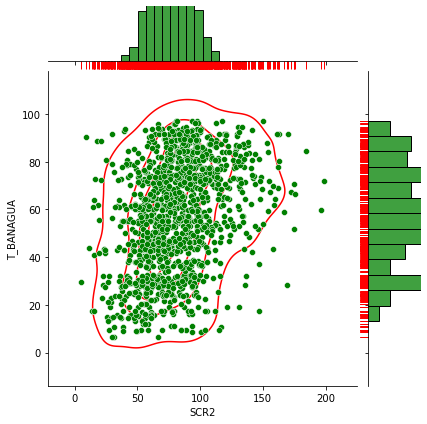

In [30]:
ax3 = sns.jointplot(x='SCR2', y="T_BANAGUA", data=df_filtro, color='g') 
ax3.plot_joint(sns.kdeplot, color="r", zorder=0, levels=5)
ax3.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

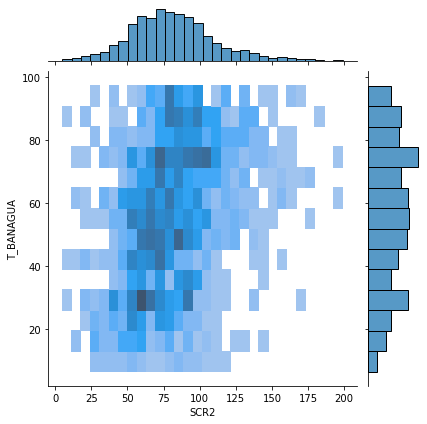

In [32]:
ax2 = sns.jointplot(data=df_filtro, x='SCR2', y="T_BANAGUA", kind="hist")

---
## RENDA

In [49]:
df_filtro.groupby(['UF']).agg({'RDPC': np.median}).reset_index()

,UF,RDPC
0,Acre,313.705017
1,Amazonas,227.584991
2,Para,279.190002
3,Rondonia,466.855011
4,Roraima,329.220001
5,Tocantins,347.029999


Text(0.5, 0, 'UF')

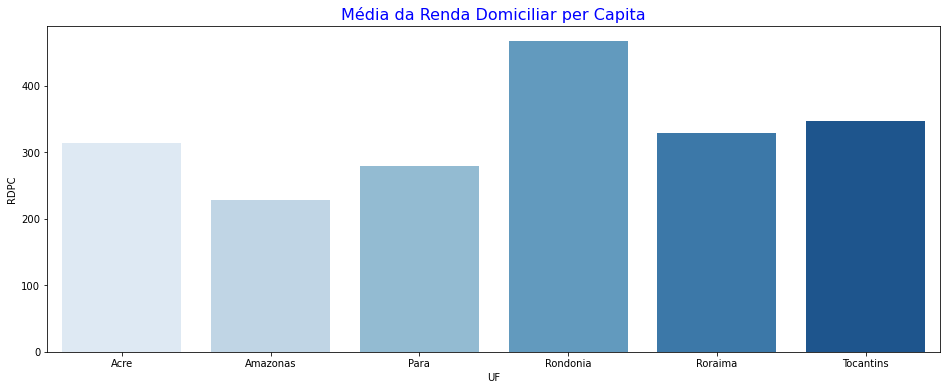

In [47]:
#RDPC
ax = sns.barplot(
    data=df_filtro.groupby(['UF']).agg({'RDPC': np.median}).reset_index()
    , x="UF"
    , y="RDPC"
    , palette = "Blues"
)

#legenda = [ax.axhline(np.median(df_media_popurb['CV_SCR1 (1 ano)']), ls='--', color='Red')
                #, ax.axhline(np.median(df_vacina['CV_SCR1 (1 ano)']), ls='-', color='Black') ]

#ax.legend(legenda, ['UF', 'Municipio'], loc='best')
    
ax.figure.set_size_inches(16,6)
ax.set_title("Média da Renda Domiciliar per Capita", fontdict={'fontsize': 16, 'color': 'Blue'})
ax.set_xlabel("UF")

In [48]:
df_filtro['RDPC'].describe()

count    1299.000000
mean      343.197388
std       141.042923
min       121.320000
25%       237.289993
50%       319.420013
75%       411.250000
max      1087.349976
Name: RDPC, dtype: float64

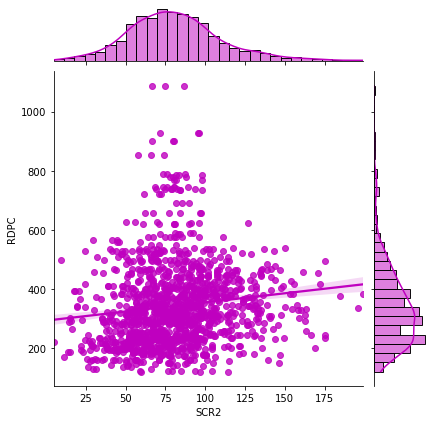

In [50]:
ax1 = sns.jointplot(data=df_filtro, x='SCR2', y="RDPC", kind="reg", color='m')

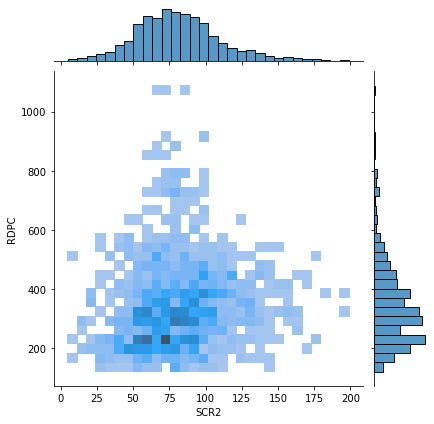

In [51]:
ax2 = sns.jointplot(data=df_filtro, x='SCR2', y="RDPC", kind="hist")

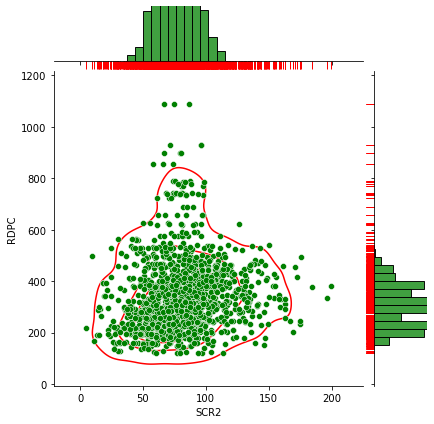

In [52]:
ax3 = sns.jointplot(x='SCR2', y="RDPC", data=df_filtro, color='g') 
ax3.plot_joint(sns.kdeplot, color="r", zorder=0, levels=5)
ax3.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

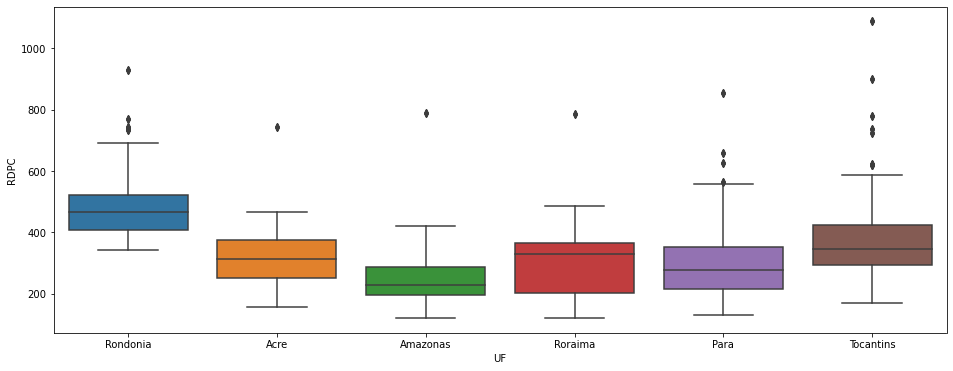

In [55]:
ax = sns.boxplot(x="UF", y="RDPC", data=df_filtro)
ax.figure.set_size_inches(16,6)